In [1]:
import cv2
from cv2 import imshow
img = cv2.imread("images.jpg", cv2.IMREAD_COLOR)

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

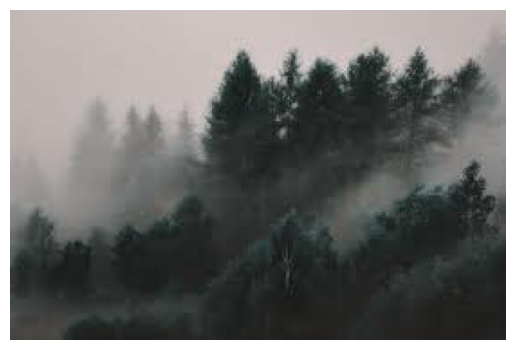

In [6]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis("off")

In [7]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

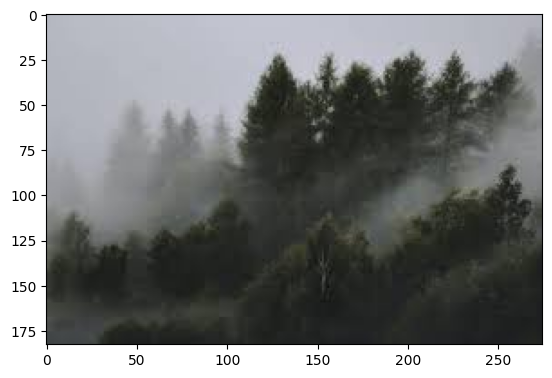

In [8]:
plt.imshow(img2)

In [9]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

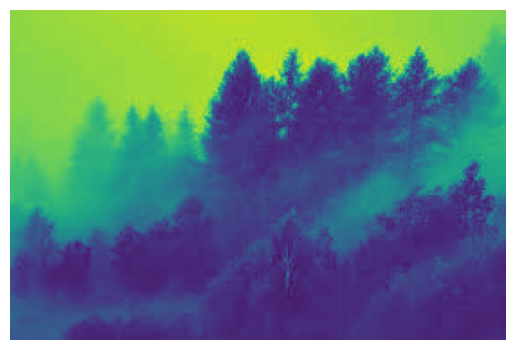

In [10]:
plt.imshow(image)
plt.axis("off")

### Gray Scale

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

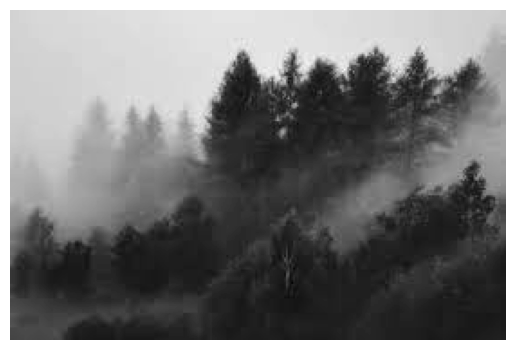

In [11]:
plt.imshow(image, cmap='gray')
plt.axis("off")

In [12]:
image

array([[183, 183, 184, ..., 178, 178, 178],
       [183, 183, 184, ..., 178, 178, 178],
       [183, 183, 184, ..., 178, 178, 178],
       ...,
       [ 67,  67,  68, ...,  34,  34,  34],
       [ 67,  67,  67, ...,  34,  34,  34],
       [ 66,  66,  67, ...,  35,  35,  35]], dtype=uint8)

### Digital Negative

In [13]:
image1 = image.copy()
height, width = image.shape
for i in range(height):
    for j in range(width):
        image1[i, j] = 255 - image[i, j]

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

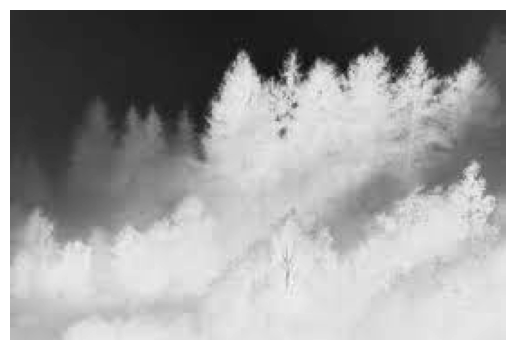

In [14]:
plt.imshow(image1, cmap='gray')
plt.axis("off")

### Thresholding

In [15]:
image2 = image.copy()
threshold = 50
for i in range(height):
    for j in range(width):
        if image2[i, j] < threshold:
            image2[i, j] = 0
        else:
            image2[i, j] = 255

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

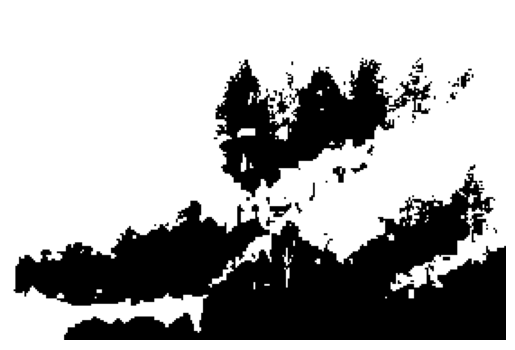

In [16]:
plt.imshow(image2, cmap='gray')
plt.axis("off")

### Gray Level Slicing W/O Background

In [17]:
def graylevel_slicing(T1, T2):
    image3 = image.copy()
    for i in range(height):
        for j in range(width):
            if image3[i, j] < T1:
                image3[i, j] = 0
            elif image3[i, j] >= T1 and image[i, j] < T2:
                image3[i, j] = 255
            elif image3[i, j] >= T2:
                image3[i, j] = 0
    return image3

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

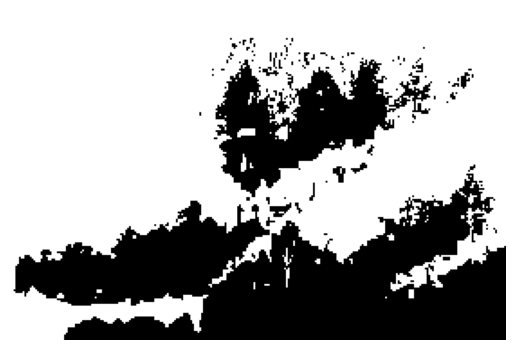

In [18]:
image3 = graylevel_slicing(50, 200)
plt.imshow(image3, cmap='gray')
plt.axis("off")

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

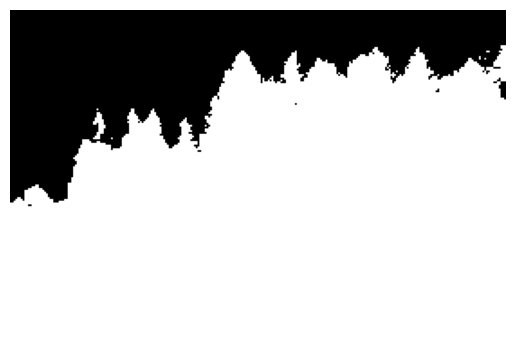

In [19]:
image3 = graylevel_slicing(10, 150)
plt.imshow(image3, cmap='gray')
plt.axis("off")

### Gray Level Slcing With Background

In [20]:
def graylevel_slicing_with_background(T1, T2):
    image3 = image.copy()
    for i in range(height):
        for j in range(width):
            if image3[i, j] < T1:
                image3[i, j] = image[i, j]
            elif image3[i, j] >= T1 and image[i, j] < T2:
                image3[i, j] = 255
            elif image3[i, j] >= T2:
                image3[i, j] = image[i, j]
    return image3

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

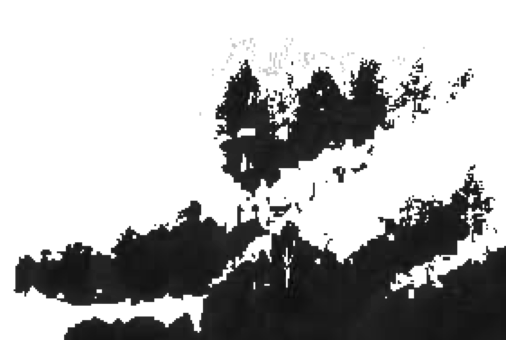

In [21]:
image4 = graylevel_slicing_with_background(50, 200)
plt.imshow(image4, cmap="gray")
plt.axis("off")

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

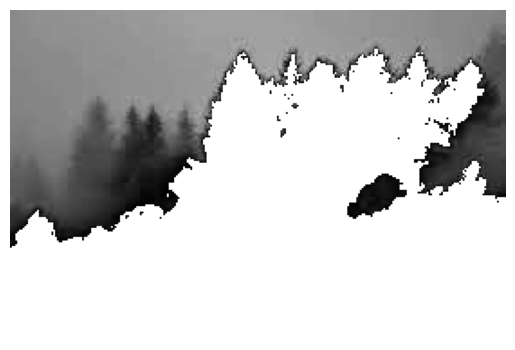

In [22]:
image4 = graylevel_slicing_with_background(10, 100)
plt.imshow(image4, cmap="gray")
plt.axis("off")

### Contrast Stretching

In [42]:
import numpy as np

def contrast_stretching(image, a, b, l, m, n):
    image = image.astype(np.float32)
    v = l * a
    image4 = image.copy()
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]): 
            if image4[i, j] <= a:
                image4[i, j] = l * image4[i, j]
            elif a < image4[i, j] <= b:
                image[i, j] = m * (image[i, j] - a) + v
            elif image4[i, j] > b:
                image[i, j] = n * (image4[i, j] - b) + m * (image[i, j] - a) + v

    return np.clip(image4, 0, 255).astype(np.uint8)

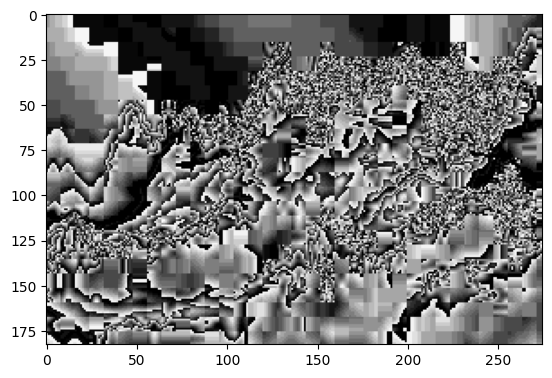

In [43]:
image4 = contrast_stretching(image, 6, 100, 0.1, 2, 0.2)
plt.imshow(image4, cmap="gray")